In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette=sns.color_palette("RdBu"))

import sys
sys.path.append('..')

from helper import logistic_regression as lr  # my own module
from helper import general as general

In [2]:
# prepare data
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
X = general.get_X(data)
print(X.shape)

y = general.get_y(data)
print(y.shape)

(100, 3)
(100, 1)


# sigmoid function

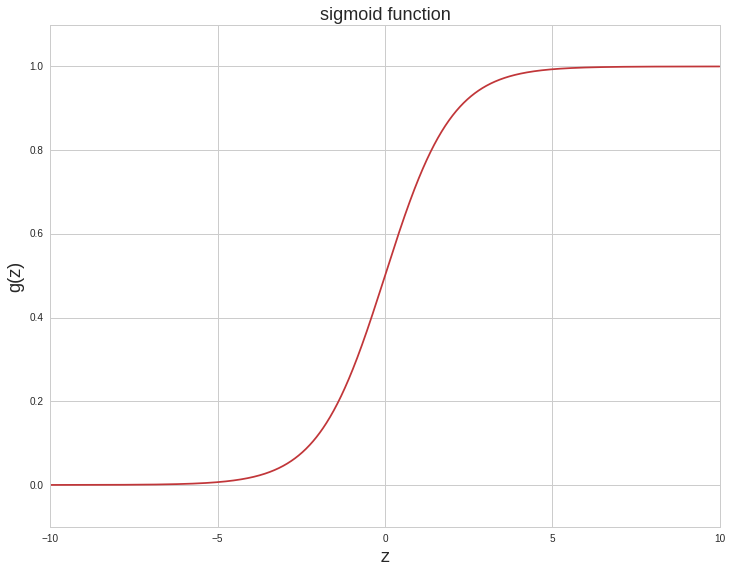

In [4]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(np.arange(-10, 10, step=0.01),
        lr.sigmoid(np.arange(-10, 10, step=0.01)))
ax.set_ylim((-0.1,1.1))
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)

# cost function
![](../img/logistic_cost.png)
> * $max(\ell(\theta)) = min(-\ell(\theta))$  
> * choose $-\ell(\theta)$ as the cost function


In [5]:
%psource lr.cost

In [25]:
theta = np.zeros((X.shape[1],1))  # X(m*n) so theta is n*1
theta

array([[ 0.],
       [ 0.],
       [ 0.]])

In [26]:
lr.cost(X, y, theta)

0.69314718055994529

looking good, be careful of the data shape

# gradient
![](../img/logistic_gradient.png)
> * this is batch gradient  
> * translate this into vector computation $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$


In [8]:
%psource lr.gradient

In [21]:
lr.gradient(theta, X, y)

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

# fit the parameter
> here I'm using [`scipy.optimize.minimize`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) to find the parameters

In [22]:
from scipy.optimize import minimize

In [24]:
res = minimize(fun=lr.cost,
               x0=theta,
               jac=lr.gradient,
               args=(X, y),
               method='TNC',
               options={'maxiter':200,
                        'disp': True})

ValueError: shapes (3,) and (100,1) not aligned: 3 (dim 0) != 100 (dim 0)